In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [53]:

path = Path("C:/Users/PC/Downloads/Detai_TGMT/UTKFace")

filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [54]:
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


# Data preprocessing

Theo nguồn data , data có khoảng 23k mẫu ảnh nên data được theo đặt tên cấu trúc như sao "1_0_0_239389.JPG" thì 1 có nghĩa là tuổi , 0 là giới tính (0 là nam , 1 là nữ) và được ngăn cách bởi dấu "_" 

In [55]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [56]:
print("Số lượng ảnh:", len(filenames))
print("Đường dẫn ảnh mẫu:", image_path[:3])
print("Tuổi mẫu:", age_labels[:5])
print("Giới tính mẫu:", gender_labels[:5])

Số lượng ảnh: 23708
Đường dẫn ảnh mẫu: ['23_1_2_20170116172910708.jpg.chip.jpg', '28_0_1_20170113150719161.jpg.chip.jpg', '26_1_0_20170116234741431.jpg.chip.jpg']
Tuổi mẫu: ['23', '28', '26', '37', '60']
Giới tính mẫu: ['1', '0', '1', '0', '0']


In [57]:
image_path

['23_1_2_20170116172910708.jpg.chip.jpg',
 '28_0_1_20170113150719161.jpg.chip.jpg',
 '26_1_0_20170116234741431.jpg.chip.jpg',
 '37_0_3_20170119202516470.jpg.chip.jpg',
 '60_0_0_20170109013457906.jpg.chip.jpg',
 '2_0_2_20161219162359990.jpg.chip.jpg',
 '8_0_0_20170110222913531.jpg.chip.jpg',
 '34_1_4_20170113011428472.jpg.chip.jpg',
 '48_1_0_20170109220544479.jpg.chip.jpg',
 '54_0_0_20170113210319475.jpg.chip.jpg',
 '63_0_0_20170113210318902.jpg.chip.jpg',
 '35_1_1_20170113001239705.jpg.chip.jpg',
 '9_1_0_20170109202813775.jpg.chip.jpg',
 '29_1_1_20170116171830504.jpg.chip.jpg',
 '56_1_0_20170103180406295.jpg.chip.jpg',
 '35_0_3_20170119201257884.jpg.chip.jpg',
 '5_0_0_20170109193414770.jpg.chip.jpg',
 '1_0_2_20161219203256078.jpg.chip.jpg',
 '14_0_3_20170104225721488.jpg.chip.jpg',
 '27_0_0_20170113210319553.jpg.chip.jpg',
 '61_1_0_20170117192059259.jpg.chip.jpg',
 '27_0_0_20170117175751139.jpg.chip.jpg',
 '34_0_4_20170105161411273.jpg.chip.jpg',
 '35_0_0_20170117204518056.jpg.chip.jpg

# Cấu trúc lại data để train model


In [58]:
# Cấu trúc lại data sử dụng Data Frames của Pandas
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [59]:
df.head()

,image,age,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0


In [60]:
# Xử lý dự đoán như đã nêu trên
gender_dict = {0:"Male",1:"Female"}

In [61]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [62]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


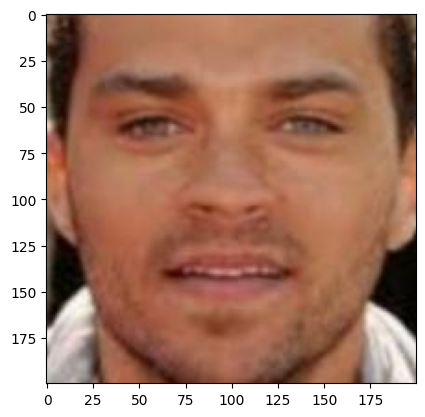

In [63]:
img = Image.open("UTKFace/"+df.image[1])
plt.imshow(img)

<Axes: xlabel='age', ylabel='Count'>

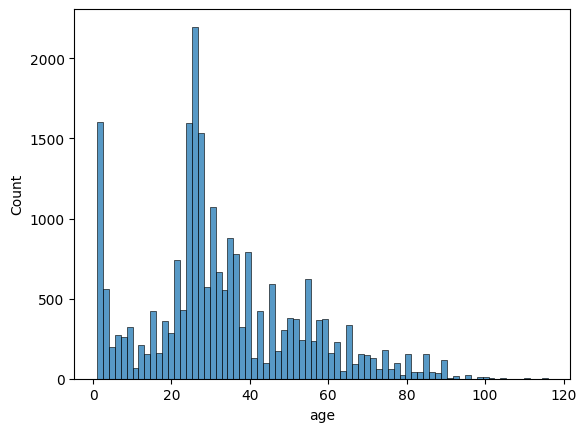

In [64]:
#Xem phân bố độ tuổi của tập dữ liệu
sns.histplot(df.age)

# Plotting Images

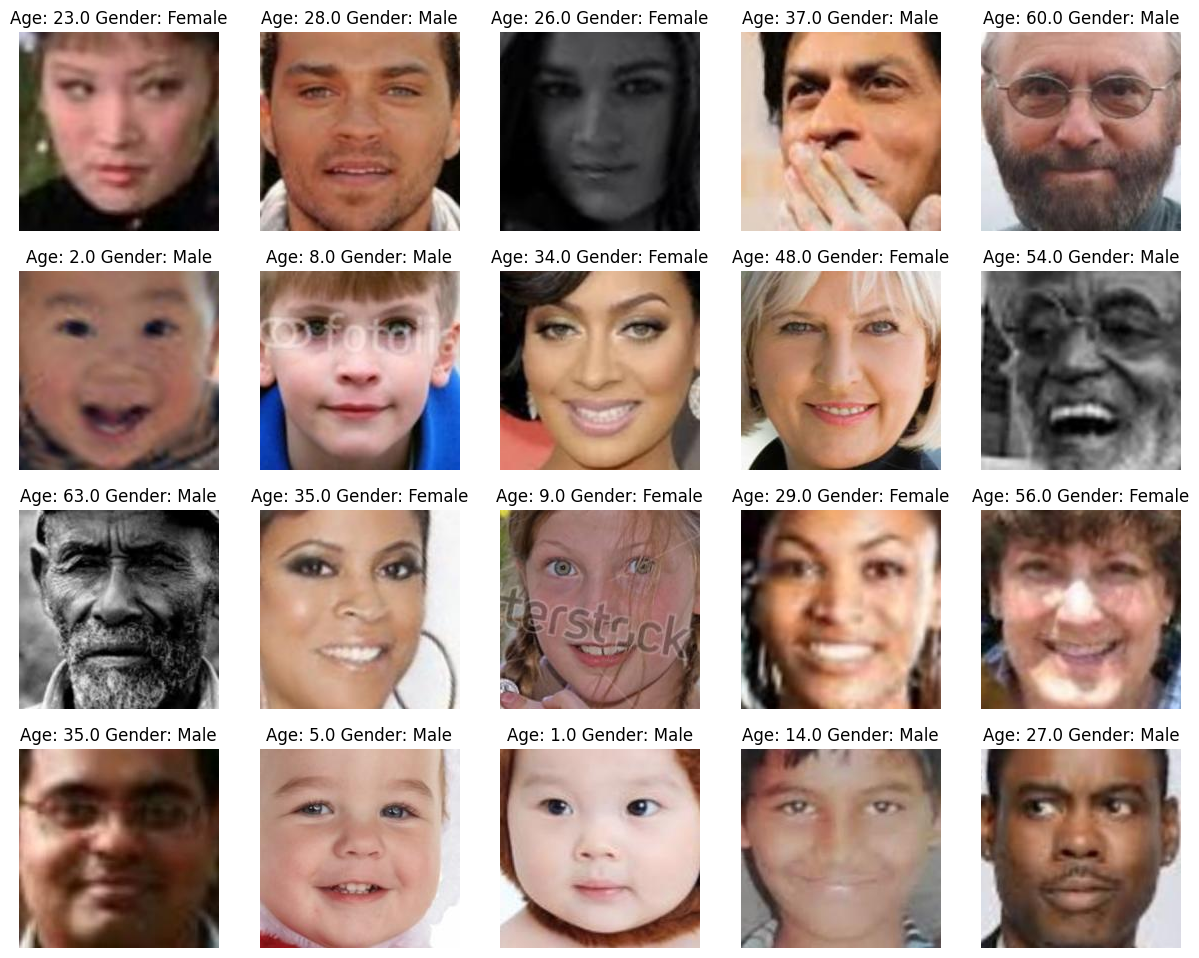

In [65]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

Với số lượng tập data là rất lớn vì thế nó sẽ tốn rất nhiều thời gian để train model vì vậy ta chia nhỏ tập data ra và mỗi lần vậy ta sẽ xáo trộn data để train nhằm đảm bảo độ chính xác của mô hình và không bị trùng lập

In [66]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [67]:
train.head()

,image,age,gender
18199,78_1_1_20170113011857601.jpg.chip.jpg,78.0,1
19557,24_0_2_20170103223924087.jpg.chip.jpg,24.0,0
20132,34_1_3_20170119152405425.jpg.chip.jpg,34.0,1
11849,46_0_3_20170119183135878.jpg.chip.jpg,46.0,0
2100,30_0_2_20170116174814595.jpg.chip.jpg,30.0,0


# Chuyển data về mảng array numby để đưa vào mạng nơ-ron nhân tạo (CNN)

In [68]:
path = Path("C:/Users/PC/Downloads/Detai_TGMT/UTKFace")
x_train = []
for file in train.image:
    img_path = path / file
    img = load_img(img_path, color_mode="grayscale")
    img = img.resize((128,128))
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

In [69]:
x_train.shape

(3556, 128, 128, 1)

# Normalizing data

In [70]:
x_train = x_train/255 #Đưa về khoảng [0,1]

In [71]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)
y_gender = y_gender.reshape(-1, 1)
y_age = y_age.reshape(-1, 1)
print(y_gender.shape, y_age.shape)

(3556, 1) (3556, 1)


In [72]:
input_size = (128,128,1)

# Khởi tạo model ở đây ta sử dụng CNN

Sử dụng CNN nhưng với 1 chút Skip Connection


In [73]:
inputs = Input(shape=input_size)
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=inputs, outputs=[output_1,output_2])

In [74]:
model.compile(
    loss={'gender_output': 'binary_crossentropy', 'age_output': 'mae'},
    optimizer='adam',
    metrics={'gender_output': 'accuracy', 'age_output': 'mae'}
)


In [75]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 126, 126,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 126, 126,  │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 42, 42,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 40, 40,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 20, 20,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 18, 18,    │    295,168 │ max_pooling2d_7[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 9, 9, 256) │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 20736)     │          0 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │  5,308,672 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │  5,308,672 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │     32,896 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 1)         │        257 │ dropout_4[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │        129 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,020,546 (42.04 MB)

 Trainable params: 11,020,418 (42.04 MB)

 Non-trainable params: 128 (512.00 B)

# Training the model

In [76]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20)

Epoch 1/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 101s 275ms/step - age_output_loss: 18.5373 - age_output_mae: 18.5373 - gender_output_accuracy: 0.6046 - gender_output_loss: 0.8623 - loss: 19.3996
Epoch 2/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 100s 281ms/step - age_output_loss: 12.9895 - age_output_mae: 12.9896 - gender_output_accuracy: 0.7560 - gender_output_loss: 0.4907 - loss: 13.4803
Epoch 3/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 99s 278ms/step - age_output_loss: 11.1895 - age_output_mae: 11.1895 - gender_output_accuracy: 0.8098 - gender_output_loss: 0.4175 - loss: 11.6070
Epoch 4/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 100s 281ms/step - age_output_loss: 9.6107 - age_output_mae: 9.6107 - gender_output_accuracy: 0.8387 - gender_output_loss: 0.3766 - loss: 9.9873
Epoch 5/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 102s 286ms/step - age_output_loss: 9.1072 - age_output_mae: 9.1072 - gender_output_accuracy: 0.8428 - gender_output_loss: 0.3377 - loss: 9.4449
Epoch 6/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 100s 282ms/step - age_output_los

# Visualizing loss

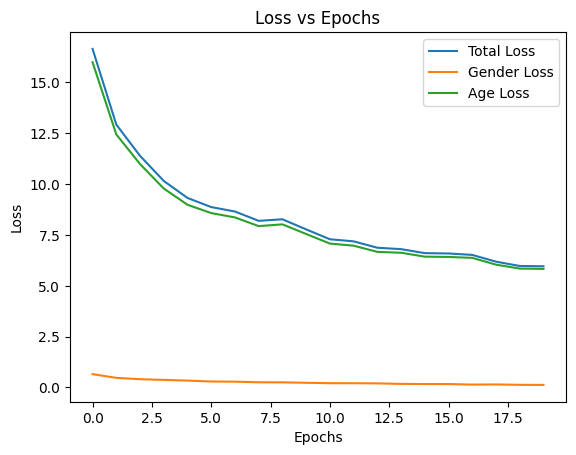

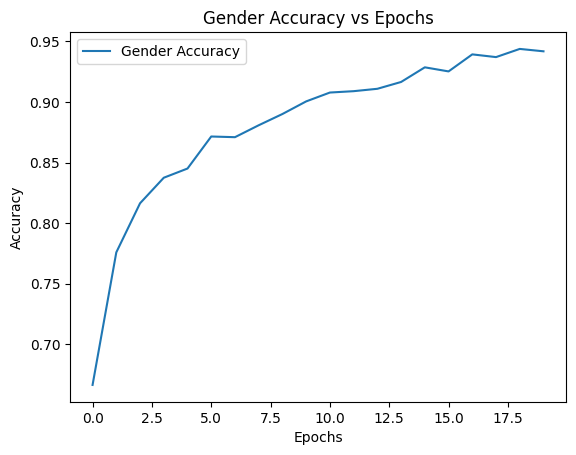

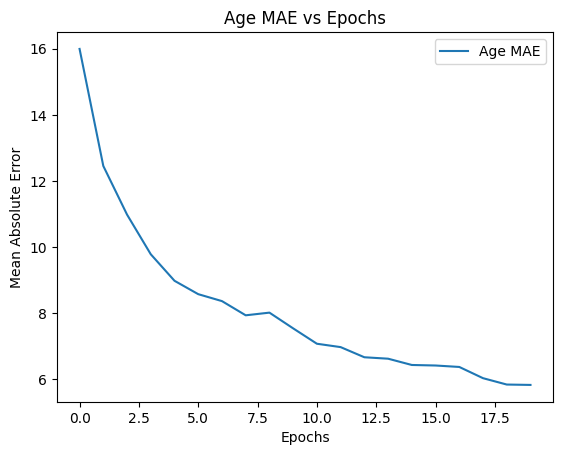

In [77]:
# Vẽ biểu đồ mất mát (loss) trong quá trình huấn luyện
import matplotlib.pyplot as plt

# Loss cho cả hai đầu ra
plt.plot(model_history.history['loss'], label='Total Loss')
plt.plot(model_history.history['gender_output_loss'], label='Gender Loss')
plt.plot(model_history.history['age_output_loss'], label='Age Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

# Độ chính xác của giới tính
plt.plot(model_history.history['gender_output_accuracy'], label='Gender Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Gender Accuracy vs Epochs')
plt.show()

# Độ lỗi của tuổi (MAE)
plt.plot(model_history.history['age_output_mae'], label='Age MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Age MAE vs Epochs')
plt.show()


# Đưa index ảnh vào để test

Original: Gender =  Male  Age =  35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Prediction: Gender =  Male  Age =  41


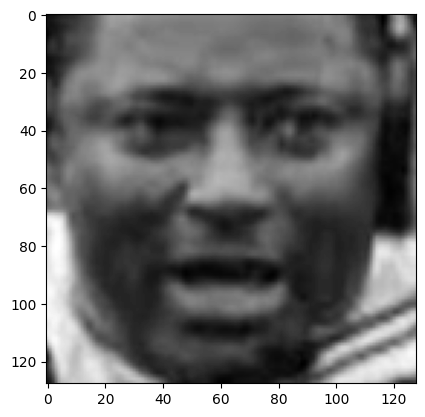

In [78]:
index = 50
print("Original: Gender = ", gender_dict[int(y_gender[index][0])], " Age = ", int(y_age[index][0]))

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender, " Age = ", pred_age)
plt.imshow(x_train[index].reshape(128, 128), cmap='gray')


Theo giá trị loss hiện tại thì model đang dính vào tình trạng overfitting / sẽ thử chuyển đổi qua resnet50 !


Original: Gender =  Female  Age =  35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Gender =  Female  Age =  28


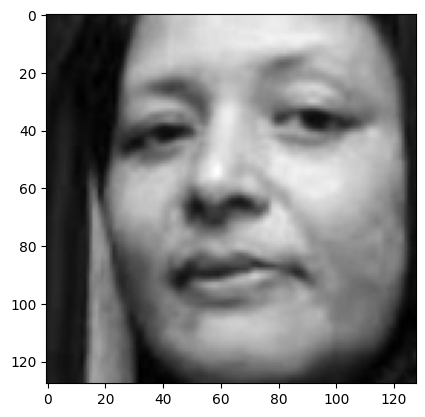

In [79]:
index=20
print("Original: Gender = ", gender_dict[int(y_gender[index][0])], " Age = ", int(y_age[index][0]))

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

In [80]:
model.save('gender_age_model.h5')  # Lưu cả kiến trúc và weights

In [81]:
model.save('gender_age_model.keras') 

In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def predict_age_gender(image_path, model, gender_dict):
    """
    Dự đoán tuổi và giới tính từ ảnh đầu vào, hiển thị cả ảnh gốc và ảnh đã xử lý
    
    Args:
        image_path: Đường dẫn đến ảnh cần dự đoán
        model: Model đã được train
        gender_dict: Dictionary ánh xạ giới tính (ví dụ: {0: 'Male', 1: 'Female'})
    
    Returns:
        Tuple (gender, age, processed_image) - Giới tính, tuổi và ảnh đã xử lý
    """
    def preprocess_image(img_path):
        # Đọc ảnh gốc (giữ lại để hiển thị)
        img_original = cv2.imread(img_path)
        if img_original is None:
            raise FileNotFoundError(f"Không thể đọc ảnh từ đường dẫn: {img_path}")
        
        # Chuyển sang grayscale và xử lý
        img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
        img_processed = cv2.resize(img_gray, (128, 128))
        img_processed = img_processed / 255.0
        
        return img_original, img_processed.reshape(1, 128, 128, 1)
    
    try:
        # Tiền xử lý ảnh
        img_original, processed_img = preprocess_image(image_path)
        
        # Dự đoán
        pred = model.predict(processed_img)
        pred_gender = gender_dict[round(pred[0][0][0])]
        pred_age = round(pred[1][0][0])
        
        # Hiển thị kết quả
        print("\nKẾT QUẢ DỰ ĐOÁN:")
        print(f"Giới tính: {pred_gender}")
        print(f"Tuổi: {pred_age}")
        
        # Chuẩn bị hiển thị
        plt.figure(figsize=(10, 5))
        
        # Ảnh gốc
        plt.subplot(1, 2, 1)
        img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
        plt.imshow(img_original_rgb)
        plt.title("Ảnh gốc")
        plt.axis('off')
        
        # Ảnh đã xử lý
        plt.subplot(1, 2, 2)
        #plt.imshow(processed_img.reshape(128, 128), cmap='gray')
        plt.imshow(img_original_rgb)
        plt.title(f"Gender: {pred_gender}\nAge: {pred_age}")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return pred_gender, pred_age, processed_img
    
    except Exception as e:
        print(f"Có lỗi xảy ra: {str(e)}")
        return None, None, None

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

KẾT QUẢ DỰ ĐOÁN:
Giới tính: Male
Tuổi: 46


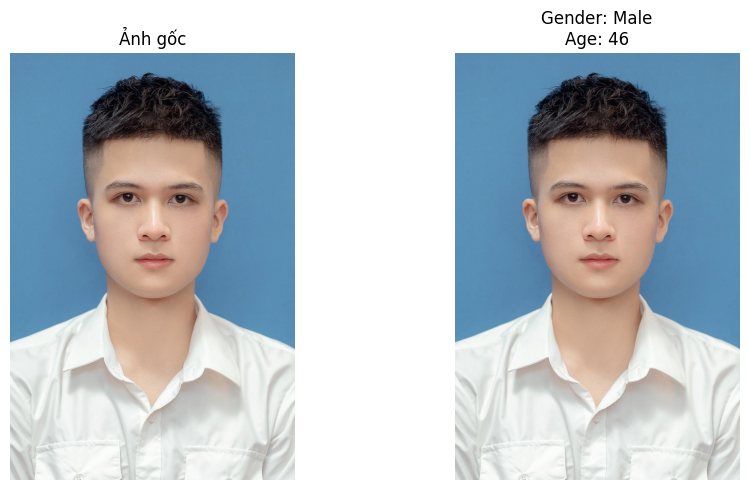

In [ ]:
# Khởi tạo model và gender_dict
# model = ... (model đã được load/train)
# gender_dict = {0: 'Nam', 1: 'Nữ'}

# Gọi hàm dự đoán
gender, age, img = predict_age_gender(
    image_path=r'C:\Users\PC\Downloads\Detai_TGMT_1\img0096-1592366363868430058761-1593507888983990295582.jpg',
    model=model,
    gender_dict=gender_dict
)